In [1]:
%load_ext autoreload
%autoreload 2

from model.autoregressive import ARModel
from utils.plotter import Plotter

import numpy as np

In [2]:
A = lambda _: np.diag([0.99, 0.2])
initial_condition = np.array([0.1, 0.0])
time_step = 0.1
system_cov = lambda _: 1 * np.eye(2)
generator = np.random.default_rng(12345)
H = lambda _: np.zeros((0, initial_condition.shape[0]))
ar_model = ARModel(A, H, initial_condition, time_step, system_cov, generator)
ar_model.input = lambda k, _: ar_model.system_error(k)

In [3]:
init_time = 0
end_time = 30
times, states = ar_model.integrate(init_time, end_time)

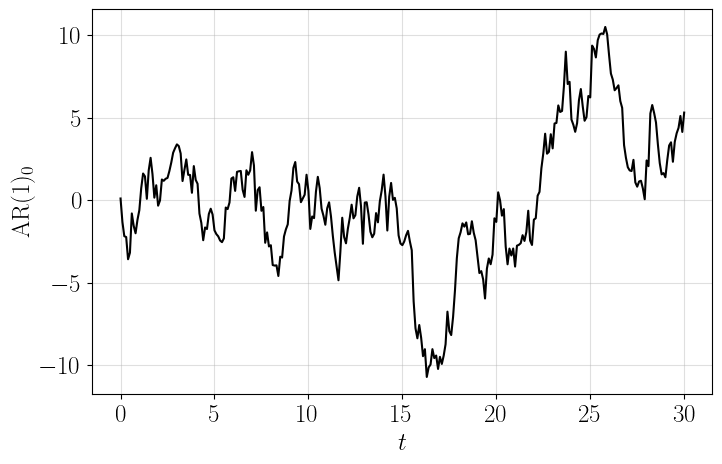

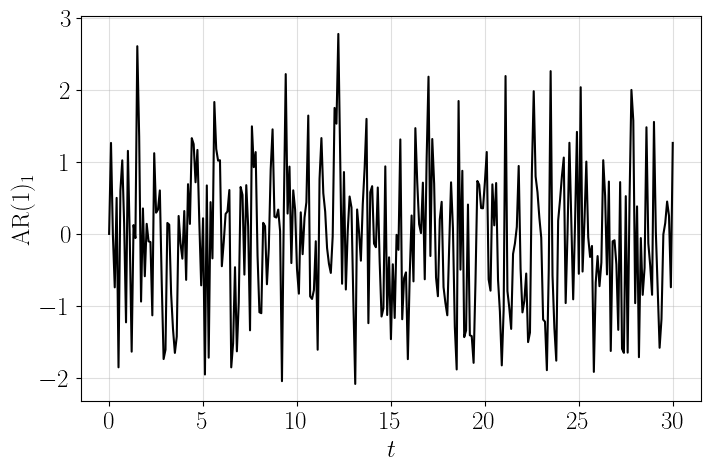

In [5]:
for i in range(len(initial_condition)):
    Plotter.plot(
        times, states[i, :], xlabel="$t$", ylabel=rf"$\mathrm{{{{AR}}}}(1)_{i}$"
    )